In [2]:
import pickle
import os

# losses = {}

# storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/training_speed_stress_test/"
# for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
#     num_products = int(fname.split('_')[-2].strip('n'))
#     with open(os.path.join(storage_dir, fname), 'rb') as f:
#         losses[num_products] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

In [20]:
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/initialize_with_unboxed_mc_sampled_components"
losses = {}
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    num_products = int(fname.split('_')[-4].strip('n'))
    scale=float(fname.split('_')[-1].strip('scale').strip('.pkl'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[f'{num_products}_{scale}'] = pickle.load(f)['total']

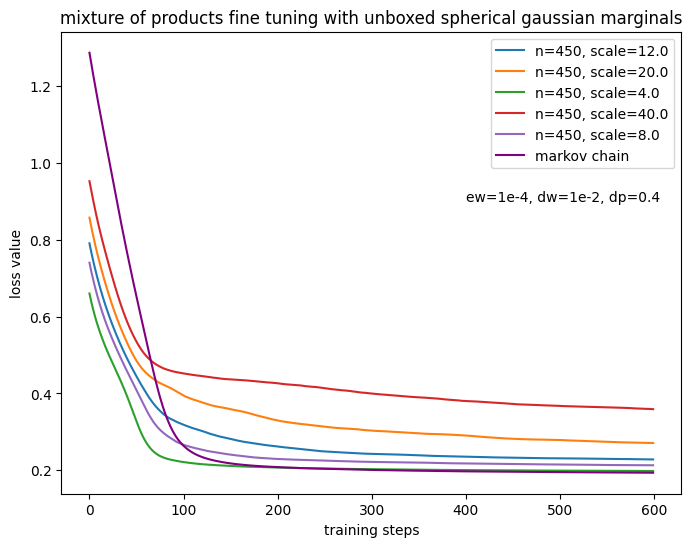

In [47]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in (losses.keys()):
    n, scale = key.split('_')
    if float(n) == 450:
        ax.plot(losses[key], label=f"n={n}, scale={scale}")
ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products fine tuning with unboxed spherical gaussian marginals"
    
)
ax.text(400, 0.90, "ew=1e-4, dw=1e-2, dp=0.4")
plt.show()

In [12]:
import numpy as np
from matplotlib import pyplot as plt

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/varying_entropy_weight_debugged/"
losses = {}
for fname in list(filter(lambda fname: "unboxed" not in fname and "losses" in fname, os.listdir(storage_dir))):
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        loss_dict = pickle.load(f)
        losses[loss_dict['metadata']['ent_weight']] = loss_dict

markov_storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/"
markov_losses = {}
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(markov_storage_dir))):
    with open(os.path.join(markov_storage_dir, fname), 'rb') as f:
        loss_dict = pickle.load(f)
        markov_losses[loss_dict['metadata']['ent_weight']] = loss_dict

%matplotlib inline

fig, axs = plt.subplots(11, 1, figsize=(8, 90))
for idx, ew in enumerate(markov_losses.keys()):
    axs[idx].plot(markov_losses[ew]['total'], label="markov_chain", color="purple")
    axs[idx].plot(losses[ew]['total'], label=f"ew={ew}, n={losses['metadata']['num_components']}, dim={losses['metadata']['box_dim']}, scale={losses['metadata']['scale']}")
    axs[idx].legend(loc="upper right")
    axs[idx].set(
        xlabel=f"training steps",
        ylabel=f"loss value",
        title=f"fine tuning from boxed marginals, ent={ew}",

    )
    axs[idx].text(0.7, 0.7, f"dw=0.01, dp=0.4", transform=axs[idx].transAxes)
plt.show()

KeyError: 'metadata'

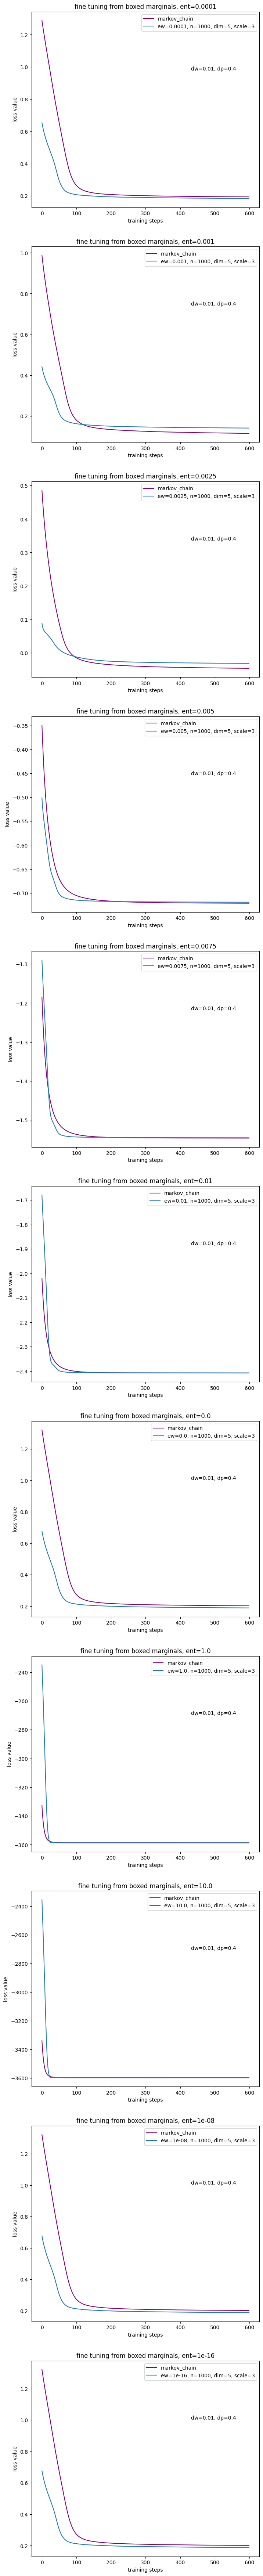

In [11]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(11, 1, figsize=(8, 90))

for idx, ew in enumerate(markov_losses.keys()):
    axs[idx].plot(markov_losses[ew], label="markov_chain", color="purple")
    axs[idx].plot(losses[ew], label=f"ew={ew}, n=1000, dim={5}, scale={3}")
    axs[idx].legend(loc="upper right")
    axs[idx].set(
        xlabel=f"training steps",
        ylabel=f"loss value",
        title=f"fine tuning from boxed marginals, ent={ew}",

    )
    axs[idx].text(0.7, 0.7, f"dw=0.01, dp=0.4", transform=axs[idx].transAxes)
plt.show()

In [5]:
from jax.nn import softmax

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/initialize_with_unboxed_mc_sampled_components"
percent_collapsed = {}
for fname in list(filter(lambda fname: "params" in fname, os.listdir(storage_dir))):
    n = int(fname.split('_')[-4].strip('n'))
    scale=float(fname.split('_')[-1].strip('scale').strip('.pkl'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        params = pickle.load(f)
    weights = softmax(params['MixtureOfProductsModel']['weights'])
    collapsed_indices = list(filter(lambda tup: tup[1] < 1/(100*n), enumerate(weights)))
    percent_collapsed[f"{n}_{scale}"] = len(collapsed_indices) / n


2023-09-29 13:25:53.336340: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:429] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2023-09-29 13:25:53.336735: E external/xla/xla/stream_executor/cuda/cuda_dnn.cc:438] Possibly insufficient driver version: 525.125.6


XlaRuntimeError: FAILED_PRECONDITION: DNN library initialization failed. Look at the errors above for more details.

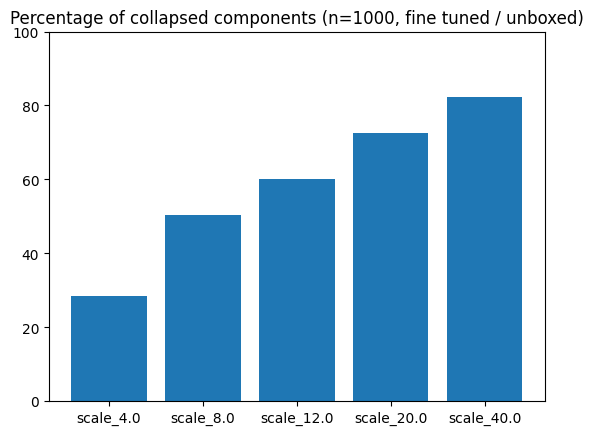

In [51]:
n = 450
scales = [4.0, 8.0, 12.0, 20.0, 40.0]
plt.bar(list(range(5)),[percent_collapsed[f"{n}_{scale}"]*100 for scale in scales], tick_label=list(map(lambda s: f"scale_{s}",scales)))
plt.title(f"Percentage of collapsed components (n={n}, fine tuned / unboxed)")
plt.ylim(0, 100)
plt.show()

TypeError: '<' not supported between instances of 'str' and 'int'

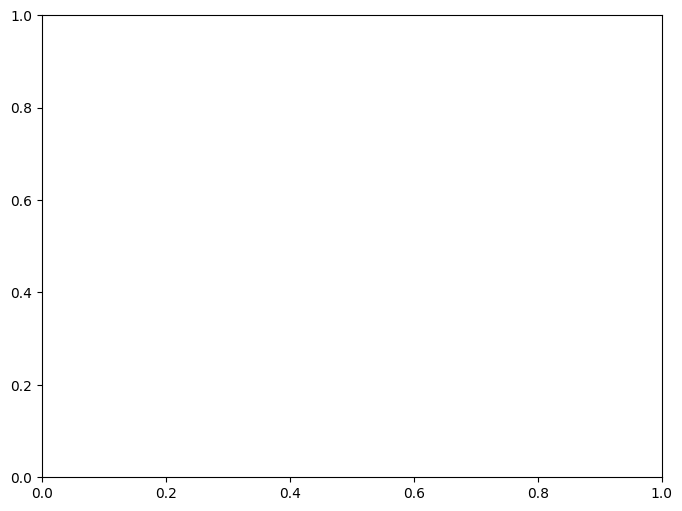

In [44]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    if key < 60 and key > 15:
        continue
    ax.plot(losses[key], label=f"n={key}")
ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products training: ew=1e-4, dw=1e-2, dp=0.4, varying n"
    
)
plt.show()

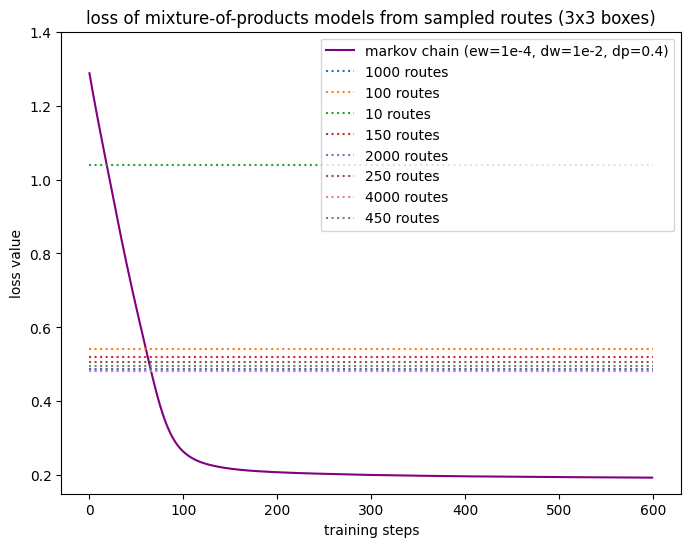

In [49]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(markov_losses, label="markov chain (ew=1e-4, dw=1e-2, dp=0.4)", color="purple")
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/mixture_of_products_from_sampled_routes"
for fname in os.listdir(storage_dir):
    if 'params' in fname:
        with open(os.path.join(storage_dir, fname), 'rb') as f:
            mop_from_routes_results = pickle.load(f)
        n_routes = mop_from_routes_results['n']
        ys = np.empty(2)
        ys.fill(mop_from_routes_results['losses'][0])
        if mop_from_routes_results['radius'] == 3:
            ax.plot([0, 600], ys, label=f'{n_routes} routes', linestyle='dotted')

for key in sorted(losses.keys()):
    if key == 1000:
        ax.plot(losses[key], label=f"mixture of products (n={key})")

ax.set(title="loss of mixture-of-products models from sampled routes (3x3 boxes)",
      xlabel=f"training steps",
    ylabel=f"loss value",
      ylim=(0.15, 1.4))
ax.legend(loc="upper right")
plt.show()

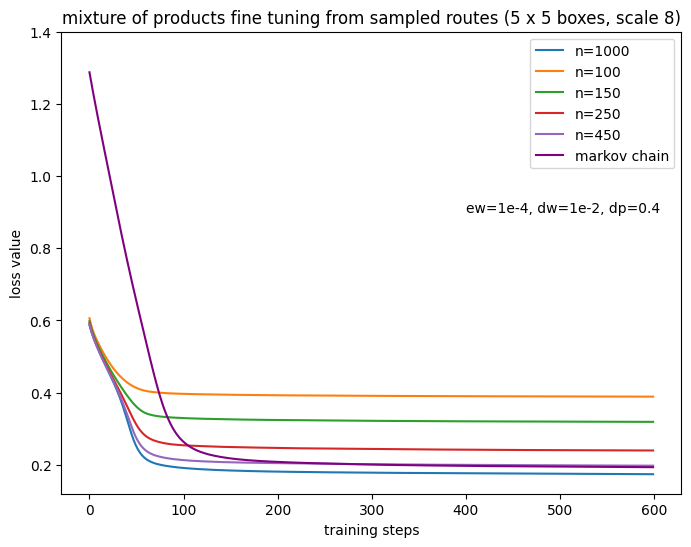

In [12]:
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt

losses = {}
box_size = 5
box_scale = 8
storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/initialize_with_mc_sampled_components/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    n = int(fname.split('_')[-4].strip('n'))
    dim = int(fname.split('_')[-2].strip('dim'))
    scale=float(fname.split('_')[-1].strip('scale').strip('.pkl'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[f'{n}_{dim}_{scale}'] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    n, dim, scale = list(map(float, key.split('_')))
    if dim==box_size and scale == box_scale:
        ax.plot(losses[key], label=f"n={int(n)}")

# storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/mixture_of_products_from_sampled_routes"
# for fname in os.listdir(storage_dir):
#     if 'params' in fname:
#         with open(os.path.join(storage_dir, fname), 'rb') as f:
#             mop_from_routes_results = pickle.load(f)
#         n_routes = mop_from_routes_results['n']
#         ys = np.empty(2)
#         ys.fill(mop_from_routes_results['losses'][0])
#         if mop_from_routes_results['radius'] == 1:
#             ax.plot([0, 600], ys, label=f'{n_routes} routes', linestyle='dotted')

ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title=f"mixture of products fine tuning from sampled routes ({box_size} x {box_size} boxes, scale {box_scale})",
    ylim=(0.12, 1.4)
)
ax.text(400, 0.90, "ew=1e-4, dw=1e-2, dp=0.4")
plt.show()

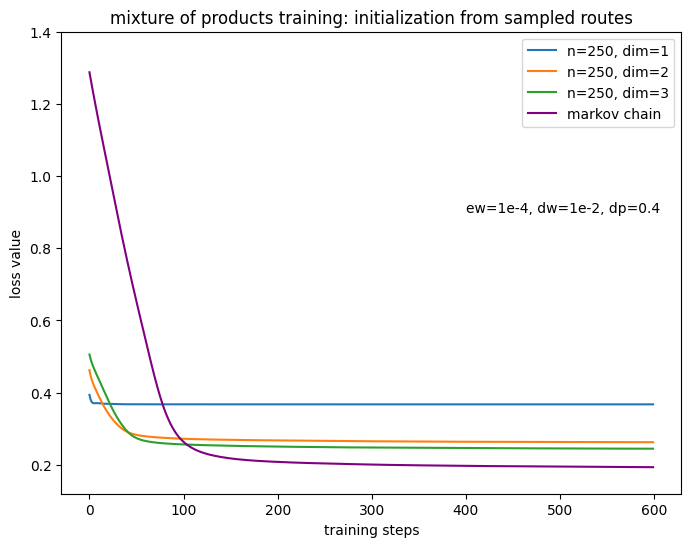

In [32]:
import pickle
import os
import numpy as np
from matplotlib import pyplot as plt

losses = {}

storage_dir = "/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/initialize_with_mc_sampled_components_sanity_check/"
for fname in list(filter(lambda fname: "losses" in fname, os.listdir(storage_dir))):
    n = int(fname.split('_')[-4].strip('n'))
    dim = int(fname.split('_')[-2].strip('dim'))
    with open(os.path.join(storage_dir, fname), 'rb') as f:
        losses[f'{n}_{dim}'] = pickle.load(f)['total']

with open('/work/pi_drsheldon_umass_edu/birdflow_modeling/jacob_independent_study/mixture_of_products/experiments/markov_chain_baselines/markov_losses_amewoo_48_obs1.0_ent0.0001_dist0.01_pow0.4.pkl', 'rb') as f:
    markov_losses = pickle.load(f)['total']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for key in sorted(losses.keys()):
    n, dim = list(map(int, key.split('_')))
    if n==250:
        ax.plot(losses[key], label=f"n={n}, dim={dim}")

ax.plot(markov_losses, label="markov chain", color="purple")
ax.legend(loc="upper right")
ax.set(
    xlabel=f"training steps",
    ylabel=f"loss value",
    title="mixture of products training: initialization from sampled routes",
    ylim=(0.12, 1.4)
)
ax.text(400, 0.90, "ew=1e-4, dw=1e-2, dp=0.4")
#print(losses["1000_2"])
plt.show()